In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/UNCW Baseball/UncwBaseball.csv")
df_leverage = pd.read_csv(r"/content/drive/MyDrive/UNCW Baseball/uncw_leverage.csv")

<ipython-input-2-8d24b0221493>:1: DtypeWarning: Columns (27,93,94,96,158) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"/content/drive/MyDrive/UNCW Baseball/UncwBaseball.csv")
<ipython-input-2-8d24b0221493>:2: DtypeWarning: Columns (1,2,5,7,8,9,11,12,13,15,19,20,21,22,23,24,27,33,68,69,70,71,72,73,74,85,86,87,88,89,90,91,93,94,95,96,97,98,99,158,159,160,161,162,163,164,165,166) have mixed types. Specify dtype option on import or set low_memory=False.
  df_leverage = pd.read_csv(r"/content/drive/MyDrive/UNCW Baseball/uncw_leverage.csv")


In [ ]:
#Used to see the amount of games covered in the dataset. Compared with schedule online
df['Date'] = pd.to_datetime(df['Date'])
schedule = df.groupby('Date')['Date'].count().sort_index()
schedule

,Date
Date,
2024-02-16,278
2024-02-17,314
2024-02-18,306
2024-02-20,312
2024-02-23,296
2024-02-24,307
2024-02-25,310
2024-02-26,354
2024-02-28,350


In [ ]:
#Used to see how many columns and rows there are in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Columns: 167 entries, PitchNo to CatcherThrowLocationConfidence
dtypes: datetime64[ns](1), float64(119), object(47)
memory usage: 68.7+ MB


In [ ]:
pitchersval = df['Pitcher'].value_counts(ascending=False)
top5names = list(pitchersval.iloc[:5])
top5names

[1167, 965, 686, 635, 498]

In [ ]:
top5 = df['Pitcher'].value_counts(ascending=False)

#Names of the top 5 pitchers as a list
names = list(top5.index[:5])

#DataFrame with the pitchers in the top 5
pitchers = df[df['Pitcher'].isin(names)]

#Group by 'Pitcher' and 'TaggedPitchType' to see how many times they threw wach pitch
pitches = pitchers.groupby(['Pitcher', 'TaggedPitchType']).size().reset_index(name='Count')
pitches

,Pitcher,TaggedPitchType,Count
0,"Calvert, Ryan",ChangeUp,33
1,"Calvert, Ryan",Cutter,154
2,"Calvert, Ryan",FourSeamFastBall,217
3,"Calvert, Ryan",Slider,94
4,"Craig, Luke",ChangeUp,7
5,"Craig, Luke",FourSeamFastBall,12
6,"Craig, Luke",Sinker,436
7,"Craig, Luke",Slider,231
8,"Sales, RJ",ChangeUp,6
9,"Sales, RJ",Curveball,277


In [ ]:
allPitchers = df.groupby(['Pitcher', 'TaggedPitchType']).size().reset_index(name='Count')

In [ ]:
top5_pitcher_info = pitchers[['Pitcher','TaggedPitchType','PlateLocHeight', 'PlateLocSide','PitchCall']]
all_pitcher_info = df[['Pitcher','TaggedPitchType','PlateLocHeight', 'PlateLocSide', 'PitchCall']]
all_pitcher_info

,Pitcher,TaggedPitchType,PlateLocHeight,PlateLocSide,PitchCall
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
53897,"Mracna, Christian",Fastball,3.17908,-1.20279,BallCalled
53898,NaN,NaN,NaN,NaN,NaN
53899,"Mracna, Christian",Fastball,2.09202,-0.85711,StrikeCalled
53900,NaN,NaN,NaN,NaN,NaN


In [ ]:
all_pitcher_info.groupby('PitchCall').size().sort_values(ascending=False)

,0
PitchCall,
BallCalled,4984
StrikeCalled,2490
InPlay,2286
FoulBall,2175
StrikeSwinging,1517
BallinDirt,409
HitByPitch,123
FoulBallNotFieldable,93
Undefined,27


In [ ]:
all_pitcher_info.groupby('TaggedPitchType').size().sort_values(ascending=False)

,0
TaggedPitchType,
FourSeamFastBall,3993
Slider,3048
Sinker,2832
ChangeUp,1566
Cutter,1191
Curveball,956
Fastball,465
Splitter,23
Undefined,22


Not a function just a plot of the top 5 pitchers pitches

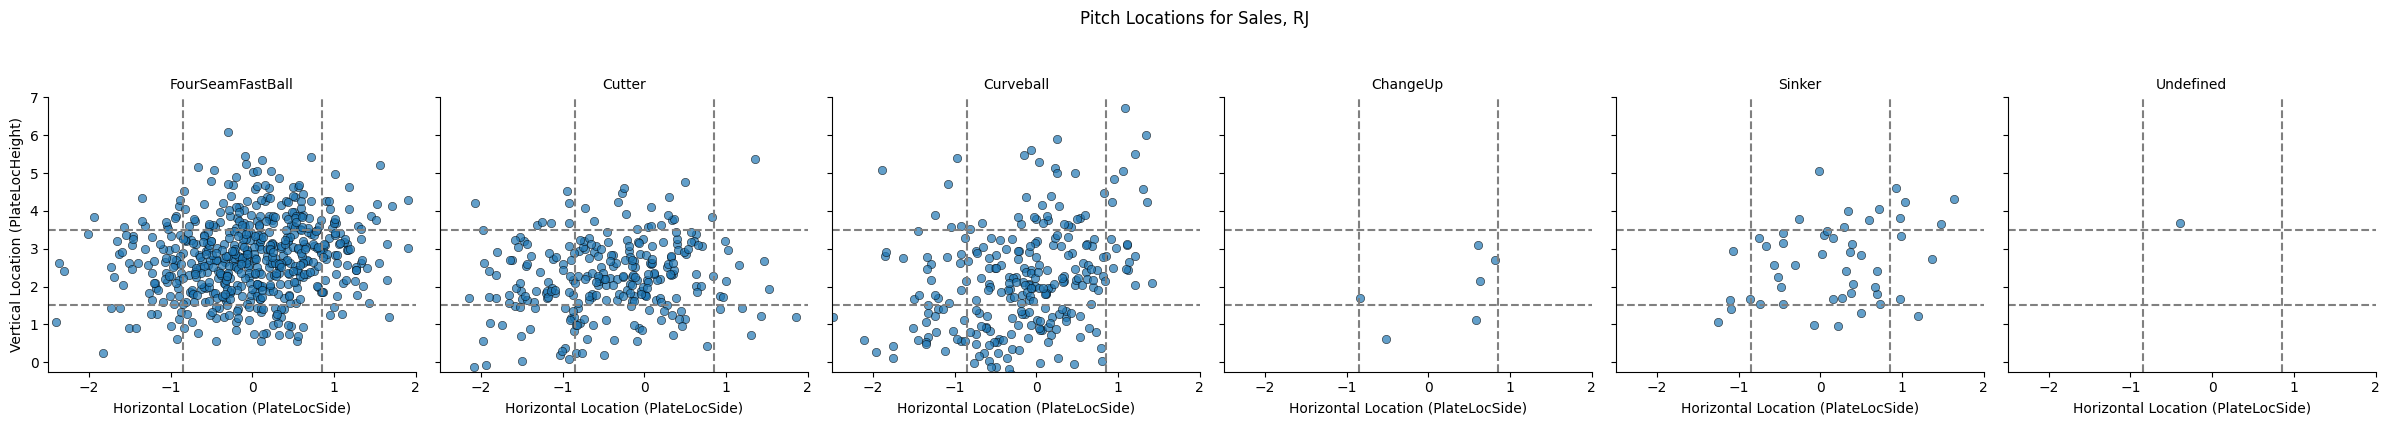

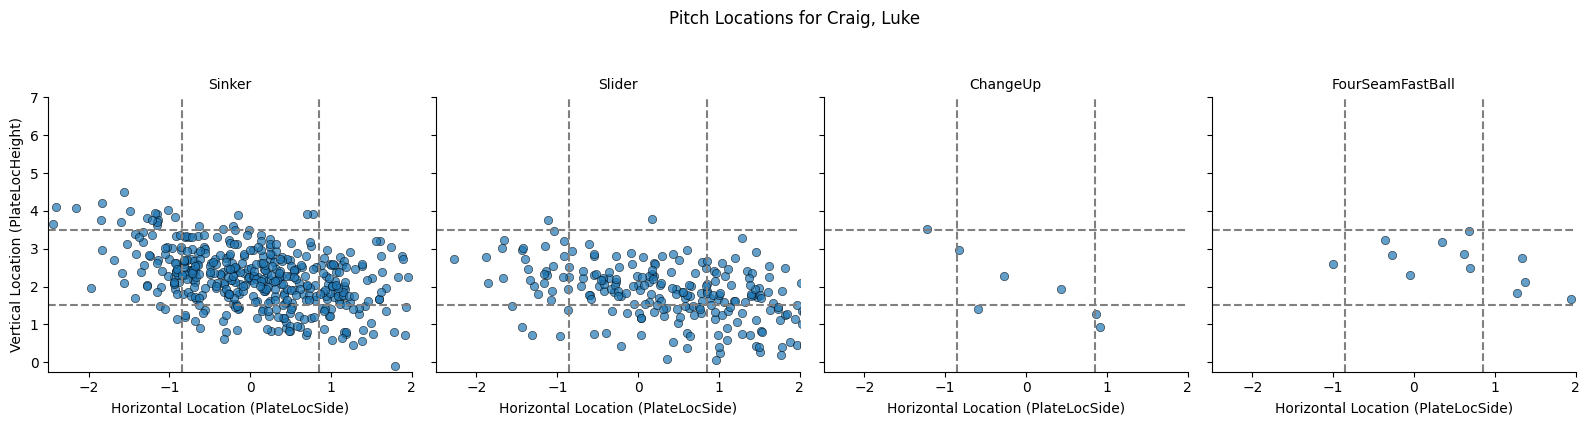

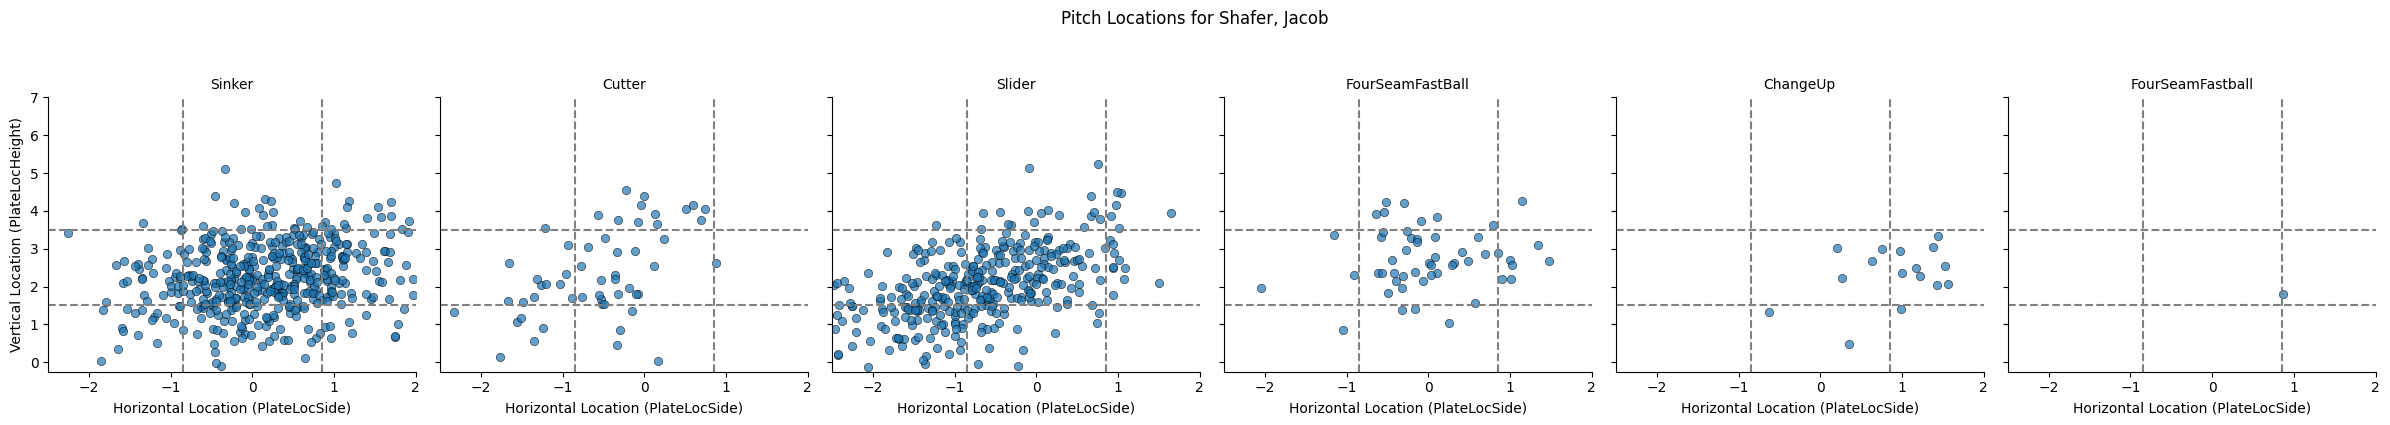

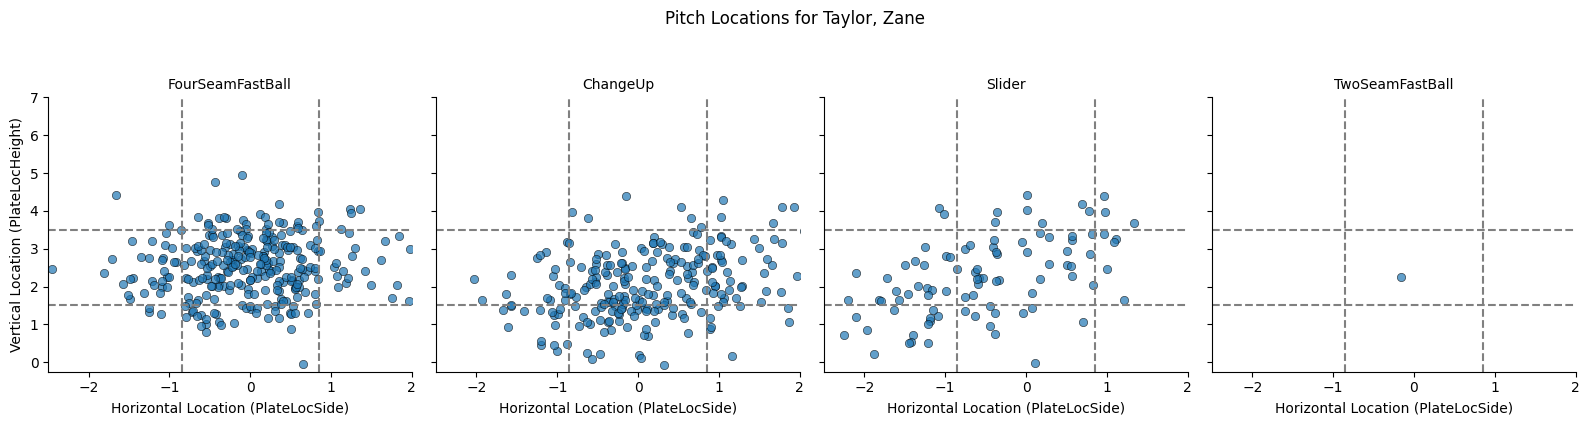

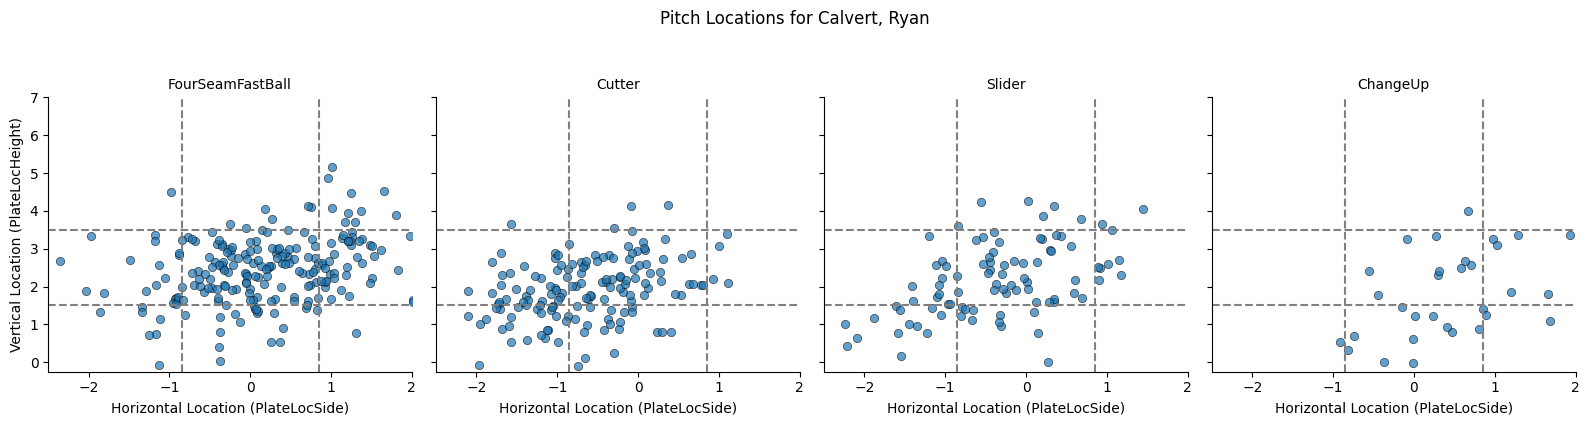

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming pitcher_info is your actual data loaded from a CSV or a full DataFrame
pitchers = top5_pitcher_info

# List of unique pitchers
unique_pitchers = pitchers['Pitcher'].unique()

# Set up the layout for each pitcher with one row per pitcher
n_pitchers = len(unique_pitchers)

# Loop through each pitcher to create a row of graphs for each pitch type
for pitcher in unique_pitchers:
    # Filter data for the current pitcher
    pitcher_data = pitchers[pitchers['Pitcher'] == pitcher]
    pitch_types = pitcher_data['TaggedPitchType'].unique()

    # Create a FacetGrid for each pitch type within the pitcher's data
    g = sns.FacetGrid(pitcher_data, col="TaggedPitchType", col_wrap=len(pitch_types), height=4, aspect=1)
    g.map(sns.scatterplot, "PlateLocSide", "PlateLocHeight", alpha=0.7, edgecolor="black")

    # Add labels and strike zone overlay
    for ax in g.axes.flat:
        ax.axhline(3.5, color='gray', linestyle='--')  # Top of strike zone
        ax.axhline(1.5, color='gray', linestyle='--')  # Bottom of strike zone
        ax.axvline(-0.85, color='gray', linestyle='--')  # Left of strike zone
        ax.axvline(0.85, color='gray', linestyle='--')  # Right of strike zone
        ax.set_xlim(-2.5, 2)
        ax.set_ylim(-.25, 7)

    g.set_axis_labels("Horizontal Location (PlateLocSide)", "Vertical Location (PlateLocHeight)")
    g.set_titles(col_template="{col_name}")
    g.fig.suptitle(f"Pitch Locations for {pitcher}", y=1.05)
    plt.tight_layout()
    plt.show()

In [ ]:
print(unique_pitchers)

['Sales, RJ' 'Craig, Luke' 'Shafer, Jacob' 'Taylor, Zane' 'Calvert, Ryan']


Function To Create Scatterplot for Specified Pitcher

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:186: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


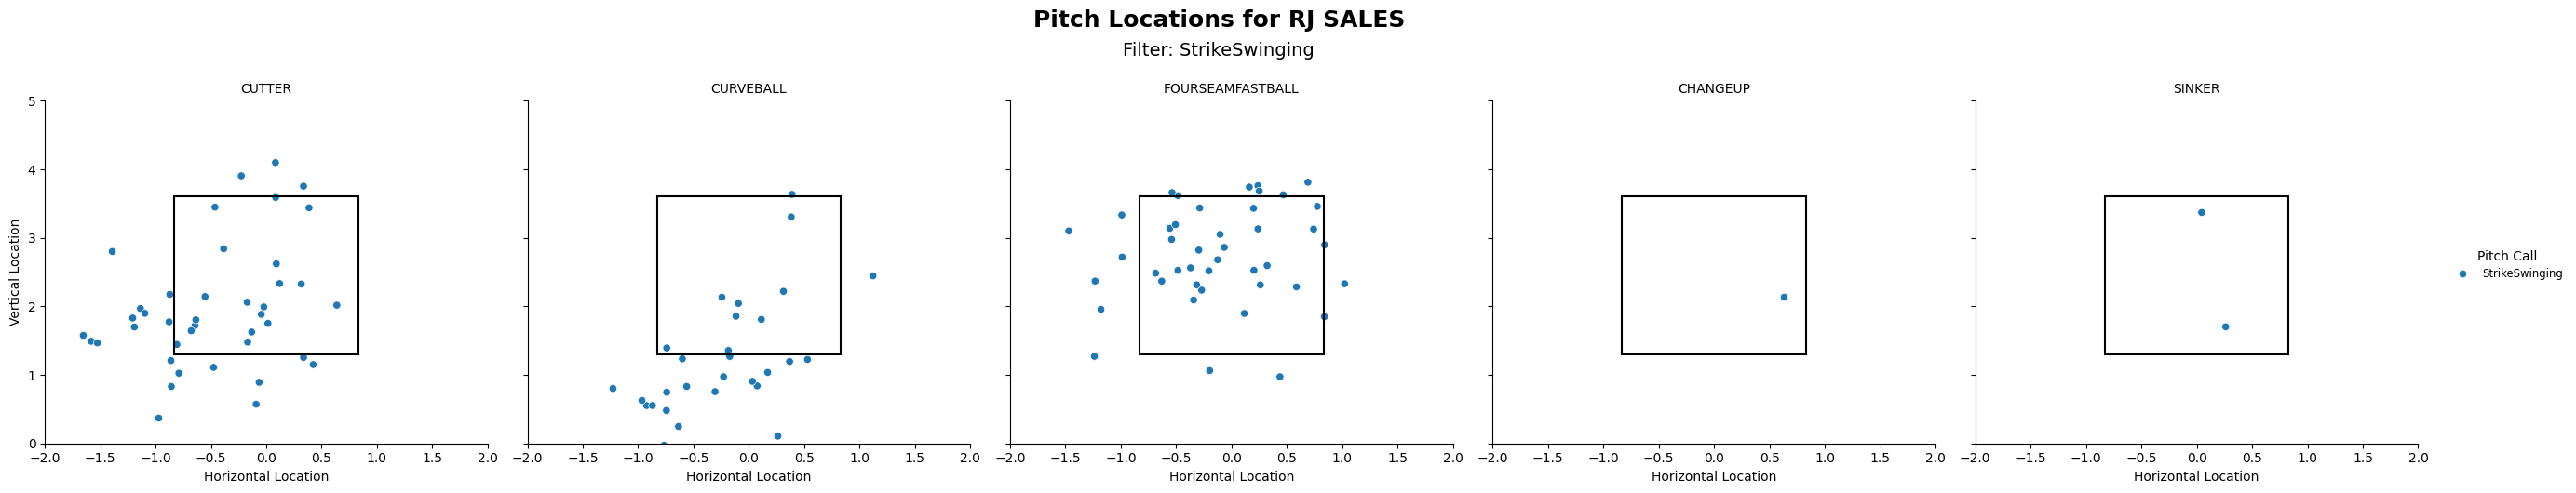

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:186: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


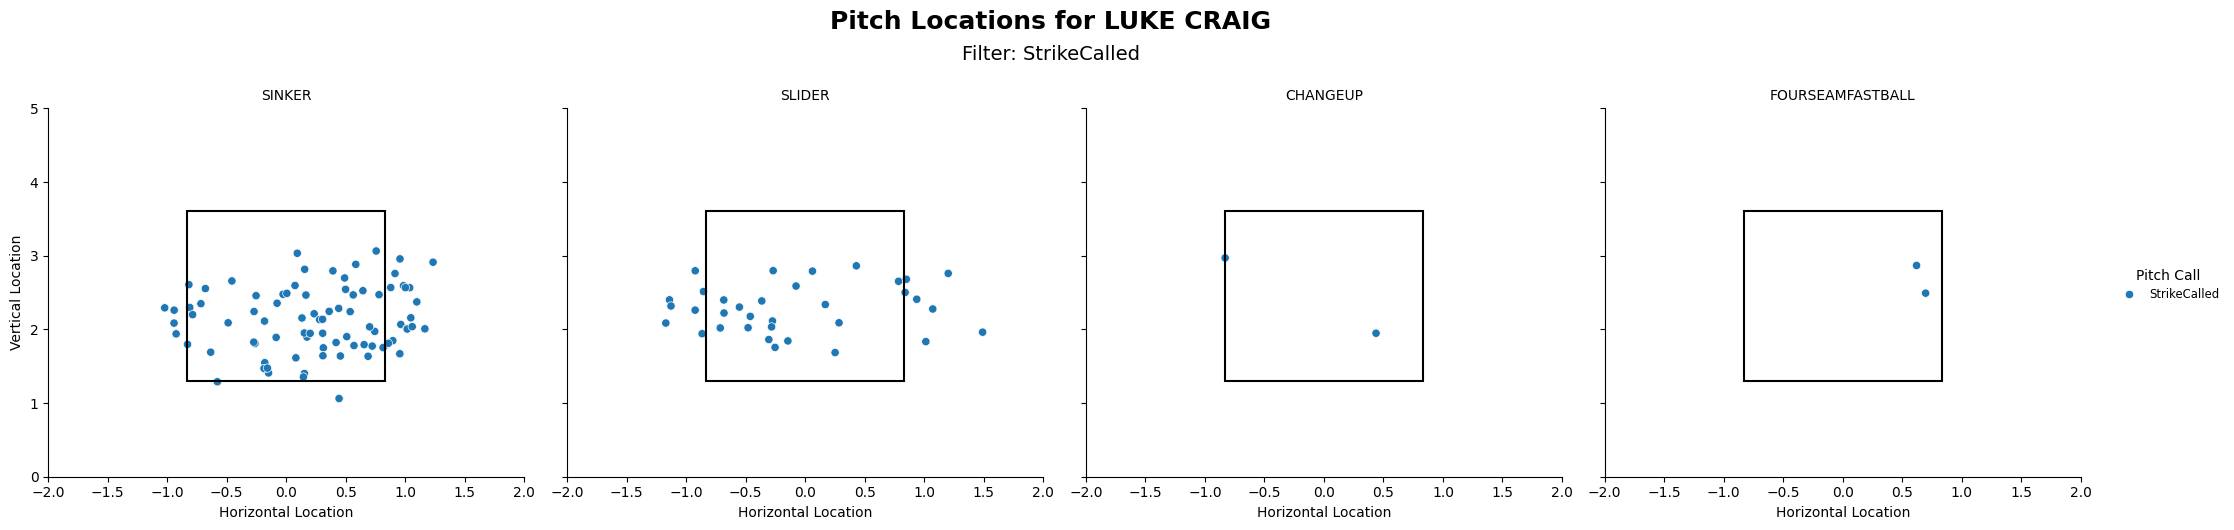

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import pandas as pd

def plot_pitcher_data_scatter(pitchers_df, pitcher_firstname, pitcher_lastname, pitch_call = None):
    """
    Generates a row of graphs showing pitch locations for each pitch type thrown by the specified pitcher.
    Helps to show what pitches the pitchers throw and their location for each.

    Parameters:
    - pitchers_df (DataFrame): The DataFrame containing pitch data with columns 'Pitcher', 'TaggedPitchType', 'PlateLocSide', and 'PlateLocHeight'.
    - pitcher_firstname (str): The first name of the pitcher so see the data from
    - pitcher_lastname (str): The last name of the pitcher so see the data from
    - pitch_call (str): Optional, the outcome of the pitch, the options are "StrikeCalled", "FoulBall", "InPlay", "BallCalled", "StrikeSwinging",
      "HitByPitch", and "BallInDirt"
    """
    #Switching both the name read in and the dataframe to all lowercase to make the function functional no matter what case is entered
    pitcher_name = (pitcher_lastname + ', ' + pitcher_firstname).lower()
    pitchers_df.loc[:, 'Pitcher'] = pitchers_df['Pitcher'].str.lower()
    #pitchers_df['Pitcher'] = pitchers_df['Pitcher'].str.lower()


    #Filter data for the specified pitcher, only includes rows where the pitchers names are equal

    pitcher_data = pitchers_df[pitchers_df['Pitcher'] == pitcher_name]


    if pitch_call:
        pitcher_data = pitcher_data[pitcher_data['PitchCall'] == pitch_call]
    #Check if data exists for the pitcher entered, if the pitcher is not recognized print a message
    if pitcher_data.empty:
        print(f"No data available for pitcher: {pitcher_name}")
        return

    #Get unique pitch types for the current pitcher to see what pitches they throw
    pitcher_data = pitcher_data[pitcher_data['TaggedPitchType'] != "Undefined"]
    pitcher_data['TaggedPitchType'] = pitcher_data['TaggedPitchType'].str.upper()
    pitch_types = pitcher_data['TaggedPitchType'].unique()

    pitcher_data = pitcher_data[~pitcher_data['PitchCall'].isin(["nan", "Undefined"])]
    unique_pitch_calls = pitcher_data['PitchCall'].unique()  # Get all unique pitch calls
    palette = sns.color_palette("tab10", len(unique_pitch_calls))  # Create a color palette
    hue_order = unique_pitch_calls

    # Create a FacetGrid for each pitch type within the pitcher's data, the col statement stratifies the graphs by pitch,
    # col_wrap tells how many pitches/graphs to display,
    g = sns.FacetGrid(pitcher_data, col="TaggedPitchType", col_wrap=len(pitch_types), height=5, aspect=1)
    g.map_dataframe(sns.scatterplot,
        x="PlateLocSide",
        y="PlateLocHeight",
        hue = "PitchCall",
        hue_order = hue_order,
        palette = palette
    )

    x_min, x_max = pitcher_data['PlateLocSide'].min() - 0.5, pitcher_data['PlateLocSide'].max() + 0.5
    y_min, y_max = pitcher_data['PlateLocHeight'].min() - 0.5, pitcher_data['PlateLocHeight'].max() + 0.5

    #x_min, x_max = -1.5, 1.5
    #y_min, y_max = 1, 6

    # Add labels and strike zone overlay
    for ax in g.axes.flat:
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)

        #Strike zone
        strike_zone = patches.Rectangle(
        (-0.83, 1.3),  # Bottom-left corner
        1.66,          # Width
        2.3,           # Height
        linewidth=1.5, edgecolor='black', facecolor='none', linestyle='-'
        )
        ax.add_patch(strike_zone)
    g.set(xlim=(-2, 2), ylim=(0, 5))
    g.set_axis_labels("Horizontal Location", "Vertical Location")
    g.set_titles(col_template="{col_name}")
    g.fig.suptitle(f"Pitch Locations for {pitcher_firstname.upper()} {pitcher_lastname.upper()}", y=1.05, fontsize=18, weight='bold')
    g.fig.text(.5,.95,f"Filter: {pitch_call}", ha='center', fontsize=14, color='black')
    handles, labels = g.axes[0].get_legend_handles_labels()
    g.add_legend(title="Pitch Call", handles=handles, labels=labels, bbox_to_anchor=(1, 0.5), loc='center left', fontsize='small')
    plt.tight_layout()
    plt.show()

#Example Usage: plot_pitcher_data_scatter(all_pitcher_info, "rj", "sales", "BallCalled")
plot_pitcher_data_scatter(all_pitcher_info, "rj", "sales", "StrikeSwinging")
plot_pitcher_data_scatter(all_pitcher_info, "luke", "craig", "StrikeCalled")


Function To Create Heatmap for Specified Pitcher

<ipython-input-15-43567f17773d>:108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


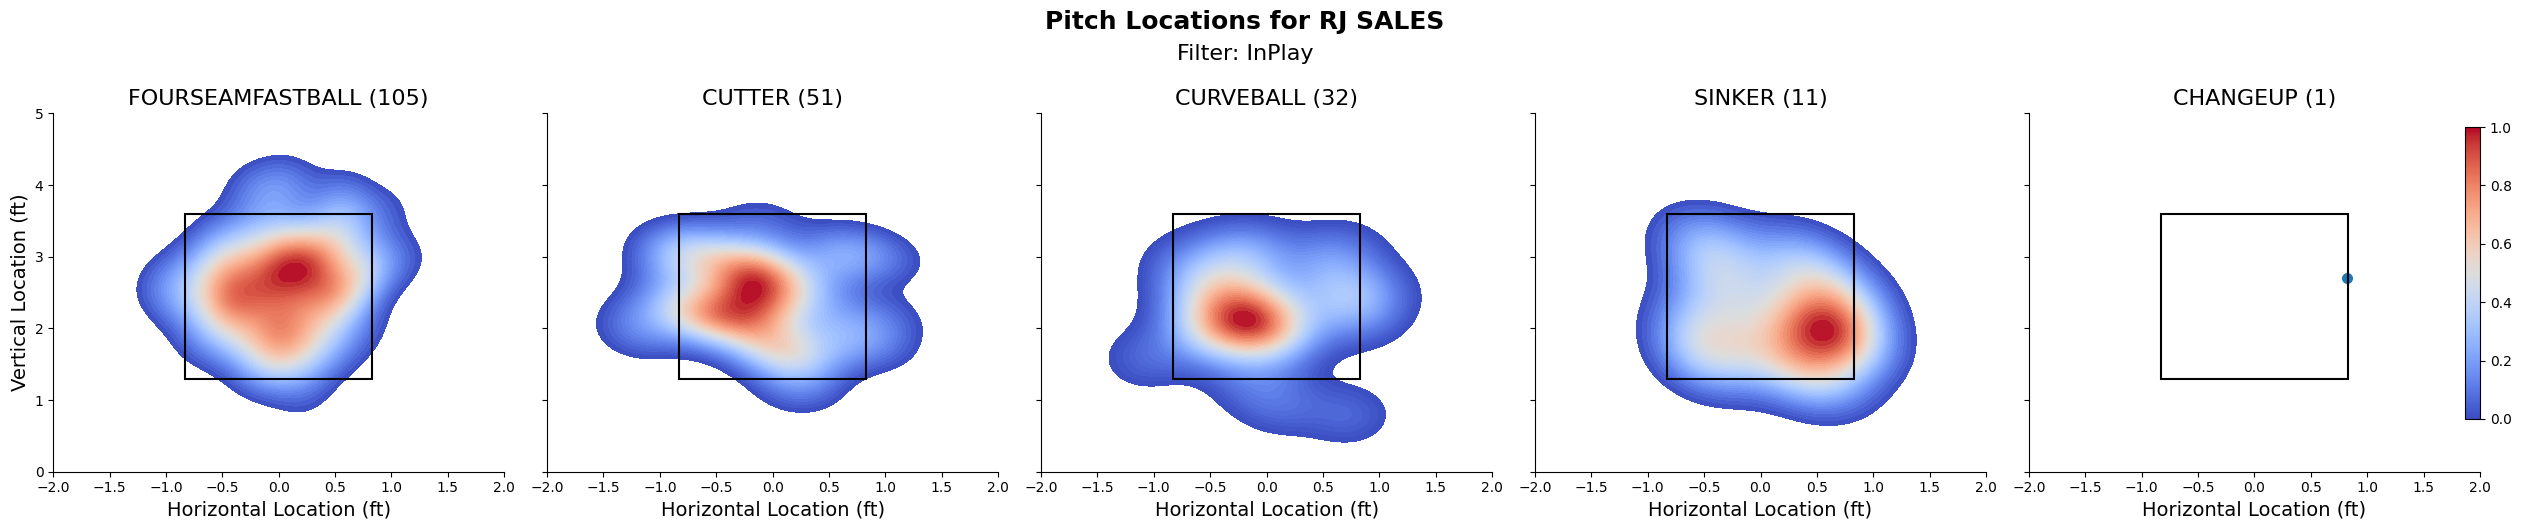

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import warnings


def plot_pitcher_data_heat(pitchers_df, pitcher_firstname, pitcher_lastname, pitch_call = None):
    """
    Generates a row of graphs showing pitch locations for each pitch type thrown by the specified pitcher.
    Helps to show what pitches the pitchers throw and their location for each.

    Parameters:
    - pitchers_df (DataFrame): The DataFrame containing pitch data with columns 'Pitcher', 'TaggedPitchType', 'PlateLocSide', and 'PlateLocHeight'.
    - pitcher_firstname (str): The first name of the pitcher so see the data from
    - pitcher_lastname (str): The last name of the pitcher so see the data from
    - pitch_call (str): Optional, the outcome of the pitch, the options are "StrikeCalled", "FoulBall", "InPlay", "BallCalled", "StrikeSwinging",
      "HitByPitch", and "BallInDirt"
    """
    warnings.filterwarnings("ignore", message="KDE cannot be estimated")

    #Switching both the name read in and the dataframe to all lowercase to make the function functional no matter what case is entered
    pitcher_name = (pitcher_lastname + ', ' + pitcher_firstname).lower()
    pitchers_df.loc[:, 'Pitcher'] = pitchers_df['Pitcher'].str.lower()
    #Filter data for the specified pitcher, only includes rows where the pitchers names are equal
    pitcher_data = pitchers_df[pitchers_df['Pitcher'] == pitcher_name].copy()


    if pitch_call:
        pitcher_data = pitcher_data[pitcher_data['PitchCall'] == pitch_call]
    #Check if data exists for the pitcher entered, if the pitcher is not recognized print a message
    if pitcher_data.empty:
        print(f"No data available for pitcher: {pitcher_name}")
        return

    #Get unique pitch types for the current pitcher to see what pitches they throw
    pitcher_data = pitcher_data[pitcher_data['TaggedPitchType'] != "Undefined"]
    pitcher_data['TaggedPitchType'] = pitcher_data['TaggedPitchType'].str.upper()
    pitch_types = pitcher_data['TaggedPitchType'].unique()
    pitch_count = pitcher_data['TaggedPitchType'].value_counts()
    sorted_pitch_types = pitch_count.index.tolist()



    #Create a FacetGrid for each pitch type within the pitcher's data, the col statement stratifies the graphs by pitch,
    #col_wrap tells how many pitches/graphs to display,
    g = sns.FacetGrid(pitcher_data, col="TaggedPitchType", col_wrap=len(pitch_types), height=5, aspect=1, col_order = sorted_pitch_types)
    def conditional_plot(data, **kwargs):
      pitch_type = data["TaggedPitchType"].iloc[0]  # Get the pitch type being plotted
      if len(data) < 5:  #If fewer than 5 pitches, use scatterplot
            sns.scatterplot(
                x="PlateLocSide",
                y="PlateLocHeight",
                data=data,
                s=75,  #Size of scatter points
                **kwargs
            )
      else:  #Heatmap
            sns.kdeplot(
                x="PlateLocSide",
                y="PlateLocHeight",
                data=data,
                fill=True,
                cmap="coolwarm",  #Color gradient for heat map
                levels=50,  #Increase number of levels for a smoother heat map
                **kwargs
            )
    g.map_dataframe(conditional_plot)

    x_min, x_max = pitcher_data['PlateLocSide'].min() - 0.5, pitcher_data['PlateLocSide'].max() + 0.5
    y_min, y_max = pitcher_data['PlateLocHeight'].min() - 0.5, pitcher_data['PlateLocHeight'].max() + 0.5

    #x_min, x_max = -1.5, 1.5
    #y_min, y_max = 1, 6

    #Add labels and strike zone overlay
    for ax, pitch_type in zip(g.axes.flat, sorted_pitch_types):  #Loop through each axes and pitch types
      pitch_count_for_type = pitch_count[pitch_type]  #Count for the specific pitch type
      ax.set_title(f"{pitch_type} ({pitch_count_for_type})", fontsize = 16)  #Set the title with pitch and number of those pitches thrown

      ax.set_xlim(x_min, x_max)
      ax.set_ylim(y_min, y_max)

        #Strike zone
      strike_zone = patches.Rectangle(
      (-0.83, 1.3),  # Bottom-left corner
      1.66,          # Width
      2.3,           # Height
      linewidth=1.5, edgecolor='black', facecolor='none', linestyle='-'
      )
      ax.add_patch(strike_zone)

    norm = mpl.colors.Normalize(vmin=0, vmax=1)  #Between 0 and 1
    sm = mpl.cm.ScalarMappable(cmap="coolwarm", norm=norm)
    sm.set_array([])  # Set empty array since we are just adding a legend
    g.fig.colorbar(sm, ax=g.axes.ravel().tolist(), orientation='vertical', fraction=0.006, pad=0.001)


    g.set(xlim=(-2, 2), ylim=(0, 5))
    g.set_axis_labels("Horizontal Location (ft)", "Vertical Location (ft)", fontsize=14)
    g.fig.suptitle(f"Pitch Locations for {pitcher_firstname.upper()} {pitcher_lastname.upper()}", y=1.05, fontsize=18, weight='bold')
    g.fig.text(.5,.95,f"Filter: {pitch_call}", ha='center', fontsize=16, color='black')
    plt.tight_layout()
    plt.show()

#Example Usage: plot_pitcher_data_heat(all_pitcher_info, "rj", "sales", "BallCalled")
plot_pitcher_data_heat(all_pitcher_info, "rj", "sales", 'InPlay')

Function for Sorting by  Leverage

<ipython-input-14-565fd5ef5e29>:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_pitches = pitcher_data.groupby('leverage').size()
<ipython-input-14-565fd5ef5e29>:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  strike_pct = (pitcher_data[pitcher_data['PitchCall'] == 'Strike'].groupby('leverage').size() / total_pitches * 100).reindex(leverage_order, fill_value=0)
<ipython-input-14-565fd5ef5e29>:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future defa

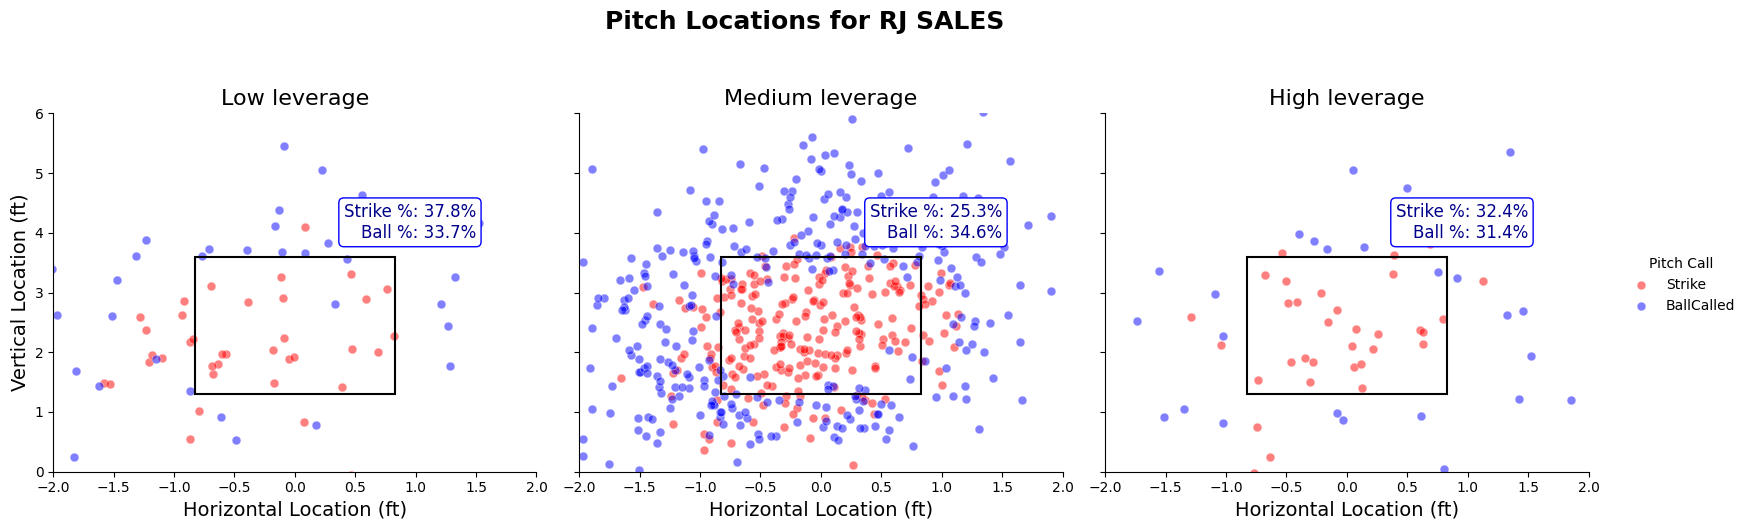

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import pandas as pd

def plot_pitcher_data_scatter_lev(pitchers_df, pitcher_firstname, pitcher_lastname):
    """
    Generates scatter plots of pitch locations for each leverage level, showing the distribution of strikes and balls.

    Parameters:
    - pitchers_df (DataFrame): Data containing pitch data with columns 'Pitcher', 'TaggedPitchType', 'PlateLocSide',
      'PlateLocHeight', 'PitchCall', and 'leverage'.
    - pitcher_firstname (str): The first name of the pitcher.
    - pitcher_lastname (str): The last name of the pitcher.
    """
    pitcher_name = (pitcher_lastname + ', ' + pitcher_firstname).lower()
    pitchers_df.loc[:, 'Pitcher'] = pitchers_df['Pitcher'].str.lower()



    #Filter data for the specified pitcher, only includes rows where the pitchers names are equal

    pitcher_data = pitchers_df[pitchers_df['Pitcher'] == pitcher_name].copy()
    # Check if data is available for the pitcher entered into the function
    if pitcher_data.empty:
        print(f"No data available for pitcher: {pitcher_name}")
        return

    #Defines consistent leverage order and combines StrikeCalled and StrikeSwinging into a single "Strike" category
    leverage_order = ["Low", "Medium", "High"]
    pitcher_data['PitchCall'] = pitcher_data['PitchCall'].replace({'StrikeCalled': 'Strike', 'StrikeSwinging': 'Strike'})
    #Makes the leverage column categorical and ensures the order stays high, medium, low throughout
    pitcher_data['leverage'] = pd.Categorical(pitcher_data['leverage'], categories=leverage_order, ordered=True)

    #Sets color palette for stikes and balls
    palette = {"Strike": "red", "BallCalled": "blue"}

    #Calculates percentages based on total pitches in each leverage level
    total_pitches = pitcher_data.groupby('leverage').size()
    strike_pct = (pitcher_data[pitcher_data['PitchCall'] == 'Strike'].groupby('leverage').size() / total_pitches * 100).reindex(leverage_order, fill_value=0)
    ball_pct = (pitcher_data[pitcher_data['PitchCall'] == 'BallCalled'].groupby('leverage').size() / total_pitches * 100).reindex(leverage_order, fill_value=0)

    relevant_data = pitcher_data[pitcher_data['PitchCall'].isin(['Strike', 'BallCalled'])]

    #Creates the FacetGrid for leverage levels
    g = sns.FacetGrid(relevant_data, col="leverage", col_order=leverage_order, hue="PitchCall", palette=palette, height=5, aspect=1)
    g.map_dataframe(sns.scatterplot, x="PlateLocSide", y="PlateLocHeight", edgecolor="w", s=40, alpha = .5)

    #Sets axis limits
    x_min, x_max = -2, 2
    y_min, y_max = 0, 6

    for ax, lev in zip(g.axes.flat, leverage_order):
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_title(f"{lev} leverage", fontsize = 16)

        #Creates a strike zone rectangle for each axis
        strike_zone = patches.Rectangle(
            (-0.83, 1.3), 1.66, 2.3, linewidth=1.5, edgecolor='black', facecolor='none', linestyle='-'
        )
        ax.add_patch(strike_zone)

        #Creates a box that highlights strike and ball percentages based on total pitches
        ax.text(1.5, 4.5, f"Strike %: {strike_pct[lev]:.1f}%\nBall %: {ball_pct[lev]:.1f}%",
                ha='right', va='top', fontsize=12, color='darkblue',
                bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.3'))

    #Sets labels, title, and add legend
    g.set_axis_labels("Horizontal Location (ft)", "Vertical Location (ft)", fontsize=14)
    g.fig.suptitle(f"Pitch Locations for {pitcher_firstname.upper()} {pitcher_lastname.upper()}", y=1.05, fontsize=18, weight='bold')

    #Adds single legend for the entire FacetGrid
    g.add_legend(title="Pitch Call", bbox_to_anchor=(1, 0.5), loc='center left', fontsize='medium')

    plt.tight_layout()
    plt.show()

#Example usage: plot_pitcher_data_scatter_lev(df_leverage, "rj", "sales")
plot_pitcher_data_scatter_lev(df_leverage, "rj", "sales")

Not used in project

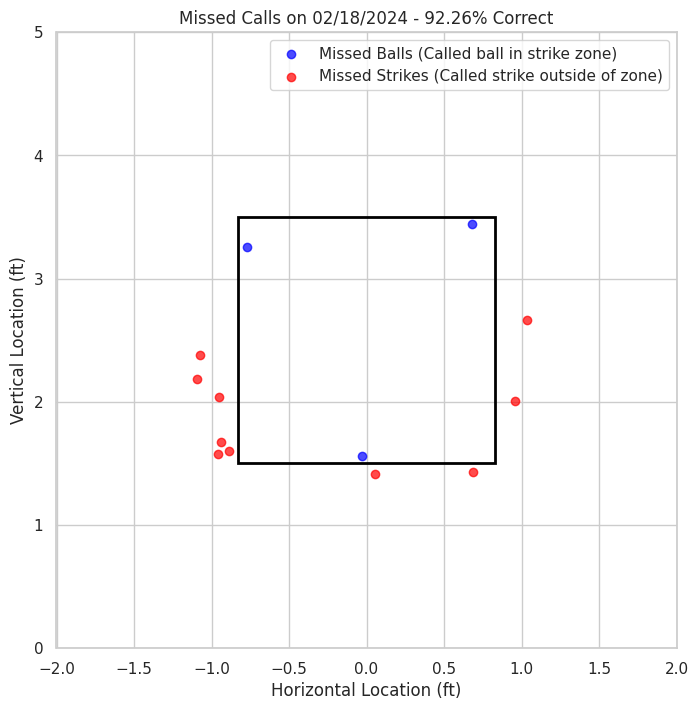

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

def umpire_scorecard_missed_calls(df, date):
    """
    Generate an umpire scorecard graphic showing the locations of missed calls for a given date and a percent correct.

    Parameters:
    df (pd.DataFrame): DataFrame containing pitch data
    date (str): The date for which to generate the scorecard (format: 'm/dd/yyyy').

    """
    #Seaborn style
    sns.set(style="whitegrid")

    #Ensure the 'Date' column is in datetime format
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

    #Convert input date to datetime
    date = pd.to_datetime(date, format='%m/%d/%Y')

    #Filter data for the specified date
    daily_data = df[df['Date'] == date]

    #Check if there is data for the given date
    if daily_data.empty:
        print(f"No data available for date {date.strftime('%m/%d/%Y')}")
        return None

    #Strike zone dimensions
    strike_zone_x = [-0.83, 0.83]
    strike_zone_y = [1.5, 3.5]

    #Identify missed calls by using the using the stikezone dimensions to check if the ball is inside or outside
    # and what the 'PitchCall' actually was. Buffer added or subtracted to add leniance for pitches on the black
    missed_balls = daily_data[
        (daily_data['PitchCall'] == 'BallCalled') &  # Ball called inside strike zone
        (daily_data['PlateLocSide'] >= strike_zone_x[0]+.05) & (daily_data['PlateLocSide'] <= strike_zone_x[1]-.05) &
        (daily_data['PlateLocHeight'] >= strike_zone_y[0] +.05) & (daily_data['PlateLocHeight'] <= strike_zone_y[1]-.05)
    ]

    missed_strikes = daily_data[
        (daily_data['PitchCall'] == 'StrikeCalled') &  # Strike called outside strike zone
        ((daily_data['PlateLocSide'] < strike_zone_x[0] - .05) | (daily_data['PlateLocSide'] > strike_zone_x[1] + .05) |
         (daily_data['PlateLocHeight'] < strike_zone_y[0] - .05) | (daily_data['PlateLocHeight'] > strike_zone_y[1] + .05))
    ]

    #Percentage of missed calls over total called pitches (pitches that the umpire played a role in determining the outcome)
    total_pitches = len(daily_data[daily_data['PitchCall'].isin(['BallCalled', 'StrikeCalled'])])
    missed_calls_count = len(missed_balls) + len(missed_strikes)
    missed_calls_percentage = 100 - (missed_calls_count / total_pitches) * 100

    #Create the plot and size
    plt.figure(figsize=(8, 8))

    #Plot missed balls in blue
    plt.scatter(missed_balls['PlateLocSide'], missed_balls['PlateLocHeight'],
                color='blue', label='Missed Balls (Called ball in strike zone)', alpha=0.7)

    #Plot missed strikes in red
    plt.scatter(missed_strikes['PlateLocSide'], missed_strikes['PlateLocHeight'],
                color='red', label='Missed Strikes (Called strike outside of zone)', alpha=0.7)

    #Draw the strike zone using matplotlib patches library
    strike_zone = Rectangle((strike_zone_x[0], strike_zone_y[0]),  # Bottom-left corner of the rectangle
                            strike_zone_x[1] - strike_zone_x[0],   # Width
                            strike_zone_y[1] - strike_zone_y[0],   # Height
                            edgecolor="black", facecolor="none", linewidth=2)
    plt.gca().add_patch(strike_zone)

    #Set plot limits and labels
    plt.xlim(-2, 2)
    plt.ylim(0, 5)
    plt.xlabel("Horizontal Location (ft)")
    plt.ylabel("Vertical Location (ft)")
    plt.title(f"Missed Calls on {date.strftime('%m/%d/%Y')} - {missed_calls_percentage:.2f}% Correct")
    plt.legend()
    plt.grid(True)


    plt.show()

#Example usage
umpire_scorecard_missed_calls(df, '2/18/2024')
